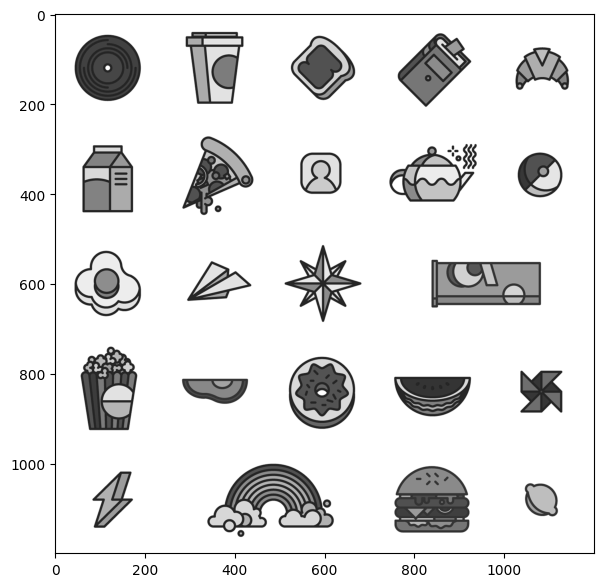

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from skimage.segmentation import active_contour
from skimage.filters import gaussian
from skimage import data
import cv2

# Đường dẫn đến hình ảnh của bạn
image_path = 'images/objects.png'  # Thay thế bằng đường dẫn hình ảnh của bạn

# Đọc và chuyển đổi hình ảnh
image = cv2.imread(image_path)
# image=data.cat()
gray_image = color.rgb2gray(image)

fig_before, ax_before = plt.subplots(figsize=(7, 7))
ax_before.imshow(gray_image, cmap=plt.cm.gray)
plt.show()

# Làm mịn hình ảnh bằng bộ lọc Gaussian
smoothed_image = gaussian(gray_image, sigma=3, preserve_range=False)


Input x coordinate: 
Input y coordinate: 
Input radius value: 


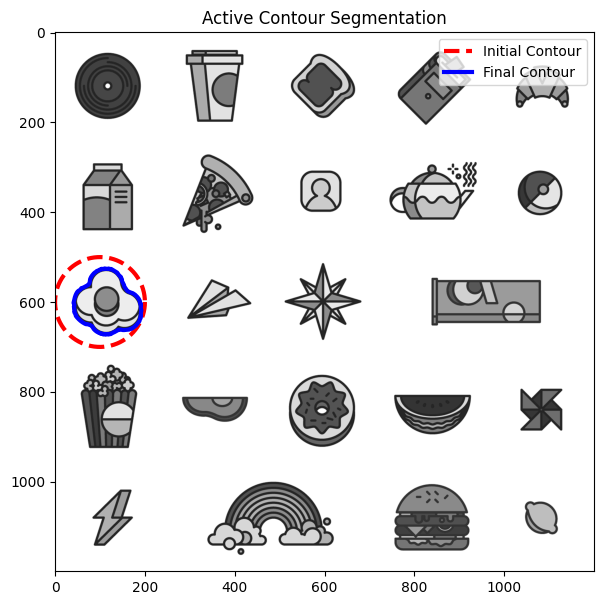

In [3]:
print('Input x coordinate: ')
_x = float(input())
print('Input y coordinate: ')
_y = float(input())
print('Input radius value: ')
_r = float(input())

# Xác định đường viền ban đầu - một vòng tròn quanh đối tượng
s = np.linspace(0, 2*np.pi, 256)
x = _x + _r*np.cos(s)  # Thay đổi giá trị cho phù hợp với hình ảnh của bạn
y = _y + _r*np.sin(s)  # Thay đổi giá trị cho phù hợp với hình ảnh của bạn
initial_contour = np.array([y, x]).T

# Thực hiện phân đoạn active contour
snake = active_contour(
    smoothed_image, 
    initial_contour, 
    alpha=0.015, 
    beta=0.05, 
    gamma=0.001
)

# Hiển thị kết quả
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(gray_image, cmap=plt.cm.gray)
ax.plot(initial_contour[:, 1], initial_contour[:, 0], '--r', lw=3, label='Initial Contour')
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3, label='Final Contour')
ax.legend(loc='best')
ax.set_title('Active Contour Segmentation')

plt.show()
